<a href="https://colab.research.google.com/github/sushma786/image-classifiction/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.51 ms (started: 2021-04-30 08:54:08 +00:00)


In [2]:
!pip install bing-image-downloader

time: 2.94 s (started: 2021-04-30 08:54:12 +00:00)


In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [5]:
from bing_image_downloader import downloader
downloader.download('rugby ball leather',limit=30,output_dir='images',
                    adult_filter_off=True) 



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cdn1.bigcommerce.com/server1000/4dd02/products/682/images/3492/_MG_0374v2__78298.1332357807.455.455.jpg?c=2
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.notonthehighstreet.com/fs/6d/b6/5cda-1aa6-492c-b641-ff1185634649/original_leather-rugby-shaped-washbag.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.notonthehighstreet.com/fs/14/cb/45f8-4377-4358-9cc0-36c127d448d0/original_personalised-vintage-leather-rugby-ball.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://static.vecteezy.com/system/resources/previews/000/104/104/original/vector-football-texture-and-lace.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://d2gg9evh47fn9z.cloudfront.net/800px_COLOURBOX19173696.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.rasasports.com/antiquefootball/image017.jpg
[Error]Invalid image, not saving https://www.ra

In [195]:
import numpy as np

a= np.array([[1,2,3,4,5],
             [4,5,6,7,8]])
a.ndim

2

time: 10.4 ms (started: 2021-04-30 13:26:54 +00:00)


In [7]:
# how do i convert matrix to vector ie flatten()
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 13.5 ms (started: 2021-04-30 08:56:41 +00:00)


In [8]:
#preprocessing
# 1. resize
# 2. flattening
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target =[]
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower','rugby ball leather','ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


   
  



time: 11.8 s (started: 2021-04-30 08:57:00 +00:00)


In [9]:
len(flat_data[0])

67500

time: 4.95 ms (started: 2021-04-30 08:57:21 +00:00)


In [192]:
150*150*3

67500

time: 5.83 ms (started: 2021-04-30 13:25:01 +00:00)


In [179]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 4.71 ms (started: 2021-04-30 13:21:51 +00:00)


<BarContainer object of 3 artists>

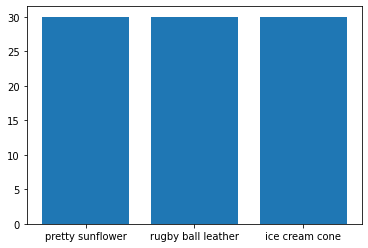

time: 140 ms (started: 2021-04-30 13:21:59 +00:00)


In [180]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [93]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)


time: 17 ms (started: 2021-04-30 11:02:01 +00:00)


In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C': [1,10,100,1000],'kernel':['linear']},  
              {'c': [1,10,100,1000],'gamma':[0.001,0.0001],
               'kernel': ['rbf']}]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit

<bound method BaseSearchCV.fit of GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'c': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

time: 15.6 ms (started: 2021-04-30 12:44:28 +00:00)


In [166]:

y_pred = clf.predict(x_test)
y_pred

NotFittedError: ignored

time: 16.2 ms (started: 2021-04-30 12:45:00 +00:00)


In [181]:

import numpy as np 
y_pred = np.zeros(27)

time: 1.3 ms (started: 2021-04-30 13:22:13 +00:00)


In [182]:

y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 4.46 ms (started: 2021-04-30 13:22:17 +00:00)


In [183]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.21 ms (started: 2021-04-30 13:22:25 +00:00)


In [184]:
accuracy_score(y_pred,y_test)

0.2962962962962963

time: 6.18 ms (started: 2021-04-30 13:22:28 +00:00)


In [185]:
confusion_matrix(y_pred,y_test)


array([[ 8, 11,  8],
       [ 0,  0,  0],
       [ 0,  0,  0]])

time: 5.66 ms (started: 2021-04-30 13:22:30 +00:00)


In [186]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 2.92 ms (started: 2021-04-30 13:22:36 +00:00)


In [187]:
model = pickle.load(open('img_model.p','rb'))

time: 1.59 ms (started: 2021-04-30 13:22:39 +00:00)


enter your URLhttps://5.imimg.com/data5/WO/OO/XB/SELLER-81577759/softy-ice-cream-cone-500x500.jpg
(500, 500, 3)
 PREDICTED OUTPUT:


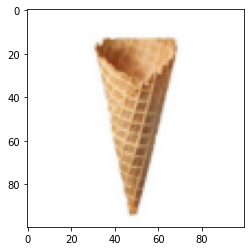

time: 7.51 s (started: 2021-04-30 14:23:59 +00:00)


In [206]:
# testing a brand new image
flat_data = []
url = input('enter your URL')
img = imread(url)
img_resized = resize(img,(100,100,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
print(f' PREDICTED OUTPUT:') 
